# Welcome

This Jupyter Notebook converts .csv survey results from [QTIP](https://www.https://qtip.geography.wisc.edu/#/) into a format that is closer to being used by the qmethod package in RStudio.

Lets import the tools we need

In [30]:
from collections import defaultdict
from dataclasses import make_dataclass
import pandas
import numpy
import os

Now point to the file directory of the .csv survey from QTIP

In [10]:
csv_in_file = input("Input your file directory: ")

Input your file directory: /Users/macuser/Documents/Jupyter Notebook/qtip_survey.csv


Every QTIP survey is unique. Lets make this work for your QTIP survey.

In [11]:
scale_answer = int(input("How many columns did your survey have? ")) - 5

How many columns did your survey have? 9


Lets read the QTIP survey results in as a table

In [19]:
participant_df = pandas.read_csv((csv_in_file), header = None, skiprows = [0], usecols = [i for i in range (0,1)])
QTIP_survey = pandas.read_csv((csv_in_file), header = None, skiprows = [0], usecols = [i for i in range(1,(scale_answer+6))])
QTIP_survey_results = [list(row) for row in QTIP_survey.values]
print (QTIP_survey_results)
print (participant_df)

[[1969, '1971, 1970', '1982, 1965, 1988', '1975, 1972, 1974, 1977, 1978', '1990, 1991, 1973, 1976, 1966, 1987, 1979', '1986, 1983, 1993, 1992, 1985', '1981, 1968, 1989', '1984, 1967', 1980], [1965, '1969, 1970', '1971, 1972, 1973', '1984, 1979, 1982, 1989, 1990', '1992, 1977, 1978, 1983, 1986, 1987, 1991', '1966, 1968, 1974, 1975, 1976', '1985, 1981, 1988', '1967, 1993', 1980], [1971, '1969, 1972', '1970, 1973, 1988', '1977, 1978, 1987, 1982, 1966', '1983, 1967, 1974, 1985, 1986, 1991, 1990', '1981, 1980, 1975, 1968, 1989', '1965, 1979, 1993', '1992, 1976', 1984], [1965, '1975, 1979', '1969, 1970, 1974', '1971, 1972, 1973, 1986, 1987', '1990, 1978, 1966, 1982, 1989, 1980, 1976', '1985, 1988, 1993, 1991, 1967', '1977, 1968, 1981', '1984, 1983', 1992], [1971, '1969, 1975', '1970, 1974, 1989', '1966, 1976, 1973, 1972, 1988', '1965, 1979, 1977, 1968, 1981, 1982, 1990', '1992, 1967, 1978, 1986, 1991', '1983, 1985, 1987', '1993, 1980', 1984], [1965, '1969, 1971', '1991, 1979, 1984', '1970, 1

Iterate through the survey and organize the data into a new dataframe

In [34]:
def user_responses(user):
  # create temporary dictionary that defaults as a list
  answer_values = defaultdict(list)
  # iterate through each answer a user gave. Enumerate gives us an index
  # which we extract to the numeric value of the answer (-4...4) later
  for index, value in enumerate(user):
    # see if it's an integer
    if isinstance(value, int):
      # scale the answer depending on the survey
      answer_values[value] = index - scale_answer
    else:
      # if the response is a string, remove the comma and turn it into a list
      temp = value.split(", ")
      for i in temp:        
          # now that it's a list, scale and append to the answer_values list
        answer_values[int(i)] = index - scale_answer
    # return so next iterations don't overwrite data
  return dict(answer_values)

def convert_table(survey_results):
  parsed_survey = []
  # iterate through each user's responses
  for user in survey_results:
    parsed_survey.append(user_responses(user))
  # return the dictionary as a dictionary, not a defaultdict
  return parsed_survey

# sort the dictionary into a table
sorted_table = convert_table(QTIP_survey_results)

# turn the table into a dataframe using pandas, which is a way to render CSVs
dataframe = pandas.DataFrame(sorted_table)
# organize the CSV so the columns are in ascending order
dataframe = dataframe.reindex(sorted(dataframe.columns), axis = 1)

#add the participants back in
df = participant_df.join(dataframe)

print (df)

          0     1965  1966  1967  1968  1969  1970  1971  1972  1973  ...  \
0   0yErNI2GmC    -2     0     3     2    -4    -3    -3    -1     0  ...   
1   5BS82FIpzv    -4     1     3     1    -3    -3    -2    -2    -2  ...   
2   5DtQC7japS     2    -1     0     1    -3    -2    -4    -3    -2  ...   
3   5yj2QbcxU3    -4     0     1     2    -2    -2    -1    -1    -1  ...   
4   A3s6yNx9cq     0    -1     1     0    -3    -2    -4    -1    -1  ...   
5   AwjsX8pPdo    -4     4     2     2    -3    -1    -3     1     1  ...   
6   CyUDYcZK79    -4     1     3     3    -1    -1    -3     2     2  ...   
7   DwOy9cxgY4     3    -2     4     3     2     2    -1     0     0  ...   
8   fxUvwQ5YzK     0     2     4    -4    -1     3    -2     1     1  ...   
9   g8t5jXezWR    -2    -3     2     2     0     3    -1    -1    -1  ...   
10  hAsViEakQR    -4     4     1     1    -3    -2    -3    -2    -1  ...   
11  I5bziogBTu     0     1    -3     1    -3     0    -4     2     2  ...   

Great! Your survey is now organized in a more manageable fashion, especially for use with the *qmethod_package* in RStudio.

Lets save the organized survey as a new .CSV file to your working directory.

In [35]:
dataframe.to_csv("REFORMATTED_QTIP_SURVEY.csv")

It can be helpful to look at the data in this way, however, there are still a few steps required to get the data in the necessary format to be used by the *qmethod_package* in RStudio. Consult [this helpful tutorial](https://www.youtube.com/watch?v=CqkOanwLFPA&ab_channel=MeasurementEvaluationResearchatWKU) (also embedded below) for a walkthrough on how to create a .DAT file for Q analysis with the REFORMATTED_QTIP_SURVEY.CSV file you just created.

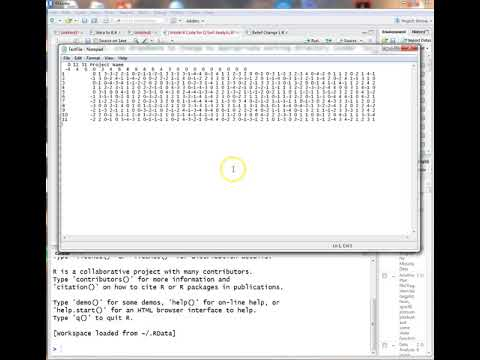

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('CqkOanwLFPA')